<img src="online.jpg">

# Online News Popularity
### Predict The Number Of Shares In Social Networks

**Author:** Hazal Aydin
***

## Business Problem

Mashable is a global, multi-platform media and entertainment company. With the increase focus of the organisation on the online channels, the marketing team wants to understand what resonates with their readers and what drives them to share the Mashable articles with their own network. Through analysing the past and predict the behaviour, the ultimate goal is to create a model to predict if an article will become viral.
***

## Data Acquisition


The dataset I'm using has a heterogeneous set of features about articles published by Mashable in a period of two years, from January 7 2013 to January 7 2015. It consists of 39644 rows and 61 columns. The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. 

Acquisition date: January 8, 2015.

***

## Setting Up The Study

In [1]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import FunctionTransformer

sns.set_theme(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Importing the Mashable Online Sales Data
df_news = pd.read_csv('data/OnlineNewsPopularity.csv')

# Checking if the dataset has stated number of rows and columns
df_news.shape

(39644, 61)

In [3]:
# Looks like the number of rows and columns are accurate.
# I can continue with previewing the dataset
df_news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.00,12.00,219.00,0.66,1.00,0.82,4.00,2.00,1.00,...,0.10,0.70,-0.35,-0.60,-0.20,0.50,-0.19,0.00,0.19,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.00,9.00,255.00,0.60,1.00,0.79,3.00,1.00,1.00,...,0.03,0.70,-0.12,-0.12,-0.10,0.00,0.00,0.50,0.00,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.00,9.00,211.00,0.58,1.00,0.66,3.00,1.00,1.00,...,0.10,1.00,-0.47,-0.80,-0.13,0.00,0.00,0.50,0.00,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.00,9.00,531.00,0.50,1.00,0.67,9.00,0.00,1.00,...,0.14,0.80,-0.37,-0.60,-0.17,0.00,0.00,0.50,0.00,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.00,13.00,1072.00,0.42,1.00,0.54,19.00,19.00,20.00,...,0.03,1.00,-0.22,-0.50,-0.05,0.45,0.14,0.05,0.14,505


In [4]:
# I will get the list of column names
df_news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

## Data Understanding

Attribute Information in the Mashable Dataset are as follows:

0. url: URL of the article
1. timedelta: Days between the article publication and the dataset acquisition
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content (number of unique words / total number of words) 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares

Stop Words usually refer to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools. For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on.

Kw_min, kw_max, and kw_avg refer to the worst, average and best metadata keywords based on their shares. And the features between 19 and 27 represents the minimum, average and maximum number of shares of these keywords.

The LDA features between 39 and 43 refer to the Latent Dirichlet Allocation (LDA) algorithm results. The LDA algorithm was applied to identify the five top relevant topics and each article was assigned a value based on the clossness of the article to such topics. 

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

Sentiment polarity refers to the overall sentiment conveyed by a particular text, phrase or word. This polarity can be expressed as a numerical rating known as a “sentiment score”. For example, this score can be a number between -100 and 100 with 0 representing neutral sentiment.

We can also see that the dataset has already partically processed. The categorical features, such as the day of the week and category are transformed by one-hot-encoding.

In [5]:
# Now, I want to explore the features more in depth

df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Comments:

* I can't see any null values in the dataset. 
* The data type of the URL is object - which is expected because it's my id column. 
* The data type of the shares is integer - which shows that the data is not transformed. It's good news because the shrares column is my dependent variant
* The rest of the variants are all floats. I can't see any immidiate issues with this datatype.

In [6]:
# Let's check if there's any duplicated entries

df_duplicated = df_news[df_news['url'].duplicated() == True]
df_duplicated.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


No duplicated URLs are found.

In [7]:
# Let's get the descriptive statistics of the feautres
# I want to display the transposed version of the output table because I have high number of features

df_news.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.00,354.53,214.16,8.00,164.00,339.00,542.00,731.00
n_tokens_title,39644.00,10.40,2.11,2.00,9.00,10.00,12.00,23.00
n_tokens_content,39644.00,546.51,471.11,0.00,246.00,409.00,716.00,8474.00
n_unique_tokens,39644.00,0.55,3.52,0.00,0.47,0.54,0.61,701.00
n_non_stop_words,39644.00,1.00,5.23,0.00,1.00,1.00,1.00,1042.00
n_non_stop_unique_tokens,39644.00,0.69,3.26,0.00,0.63,0.69,0.75,650.00
num_hrefs,39644.00,10.88,11.33,0.00,4.00,8.00,14.00,304.00
num_self_hrefs,39644.00,3.29,3.86,0.00,1.00,3.00,4.00,116.00
num_imgs,39644.00,4.54,8.31,0.00,1.00,1.00,4.00,128.00
num_videos,39644.00,1.25,4.11,0.00,0.00,0.00,1.00,91.00


Comments:

* The sentiment polarity score is assigned between -1 and 1, instead of -100 and 100.
* There are magnitude difference in the numerical values. It needs to be address while running a multilinear regression model.
* Kw_min_min, kw_avg_min, and kw_min_avg have negative values. I want to investigate how "share numbers" can be assigned a negative	value.

In [8]:
# Let's investigate the negative keyword features
df_1 = df_news[df_news [' kw_min_min'] < 0]
df_1.shape

(22980, 61)

In [9]:
df_2 = df_news[df_news [' kw_avg_min'] < 0]
df_2.shape

(833, 61)

In [10]:
df_3 = df_news[df_news [' kw_min_avg'] < 0]
df_3.shape

(6, 61)

In [11]:
df_1.iloc[:,19:27].head()

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg
16651,-1.00,1300.00,357.00,3300.00,843300.00,443157.14,1835.58,5610.74
16652,-1.00,2500.00,512.11,861.00,843300.00,137417.89,861.00,3422.16
16653,-1.00,577.00,260.33,1700.00,843300.00,264933.33,1012.43,3406.59
16654,-1.00,37000.00,5530.29,37000.00,843300.00,310300.00,3406.59,37000.00
16655,-1.00,651.00,255.43,0.00,843300.00,169012.50,0.00,3717.89


Given that close to 60% of the data has a negative value for some of the keyword features, I don't believe that it's due to a mistake. I will assume that these values are transformed. It seems like not being able to communicate with the people who extracted the data and made the initial transformations will present its challenges in this study.

In [12]:
# Finally, I realised some of the column names have space.
# Let's fix it before moving forward
df_news.columns = df_news.columns.str.replace(' ', '')

In [13]:
# Renaming a column name where I saw a typo

df_news.rename(columns = {'self_reference_avg_sharess':'self_reference_avg_shares'}, inplace = True)

In [14]:
df_news.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
      

In [15]:
# I'll create new features that I may need to use
# Creating the number of external links feature called num_external_hrefs"

df_news ['num_external_hrefs'] = df_news ['num_hrefs'] - df_news ['num_self_hrefs']

In [16]:
df_news ['is_weekend'].value_counts()

0.00    34454
1.00     5190
Name: is_weekend, dtype: int64

In [17]:
# Finally, I can't get more info on the LDA features. I'm dropping them.
df_news = df_news.drop(['LDA_00', 'LDA_01', 'LDA_02','LDA_03', 'LDA_04'], axis=1)

## Explanatory Analysis

Before diving into the multilinear regression analysis, I want to perform explanatory analysis to understand the data I'm working with. It'll also give me some insights around what worked and what not in the past.

In [18]:
# Let's drop the columns that we won't use in the exploratory analysis and create a new dataframe

df_exp = df_news.drop(['timedelta', 'kw_min_min','kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
                      'kw_avg_avg', 'average_token_length','self_reference_min_shares', 'self_reference_max_shares', 
                      'self_reference_avg_shares', 'is_weekend', 'rate_positive_words','rate_negative_words', 
                      'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity'], axis=1)

In [19]:
# Let's understand "shares"

df_exp['shares'].describe()

count    39644.00
mean      3395.38
std      11626.95
min          1.00
25%        946.00
50%       1400.00
75%       2800.00
max     843300.00
Name: shares, dtype: float64

I want to categorise the shares using a 7-points scale

* Exceptional = Top 95%
* Excellent = Between 95% and 90%
* Very Good = Between 90% and 75%
* Good = Between 75% and 60%
* Average = Between 60% and 40%
* Below Average = Between 40% and 25%
* Poor = Between 25% and 0.5%
* Very Poor = Bottom 5%

In [20]:
df_exp['shares'].quantile(0.05)

584.0

In [21]:
df_exp['shares'].quantile(0.10)

708.0

In [22]:
df_exp['shares'].quantile(0.25)

946.0

In [23]:
df_exp['shares'].quantile(0.4)

1200.0

In [24]:
df_exp['shares'].quantile(0.6)

1800.0

In [25]:
df_exp['shares'].quantile(0.75)

2800.0

In [26]:
df_exp['shares'].quantile(0.9)

6200.0

In [27]:
df_exp['shares'].quantile(0.95)

10800.0

In [28]:
share_data = df_exp['shares']

In [29]:
# I will create a new feature for the share performance

share_category = list()
for share in share_data:
    if share <= 584:
        share_category.append('very poor')
    elif share > 584 and share <= 946:
        share_category.append('poor')
    elif share > 946 and share <= 1200:
        share_category.append('below average')
    elif share > 1200 and share <= 1800:
        share_category.append('average')
    elif share > 1800 and share <= 2800:
        share_category.append('good')
    elif share > 2800 and share <= 6200:
        share_category.append('very good')
    elif share > 6200 and share <= 10800:
        share_category.append('excellent')
    else:
        share_category.append('exceptional')

# Adding the new list to the dataframe
df_exp ['share_performance'] = share_category

df_exp.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'num_external_hrefs',
       'share_performance'],
      dtype='object')

In [30]:
# Merging the weekdays dummy variables as one single column

day_of_the_week=df_exp[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(day_of_the_week.shape[0])):
    for c in list(range(day_of_the_week.shape[1])):
        if ((c==0) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (day_of_the_week.iloc[r,c])==1):
            temp_arr.append('Saturday') 
            
df_exp.insert(loc=11, column='day_of_the_week', value=temp_arr)

In [31]:
# I'll merge the channel dummy variables
# First I want to see if any of the columns were dropped to avoid dummy variable trap before I obtain the data
df_exp['channel_check'] = df_exp['data_channel_is_lifestyle'] + df_exp['data_channel_is_entertainment'] 
+ df_exp['data_channel_is_bus'] + df_exp['data_channel_is_socmed'] + df_exp['data_channel_is_tech'] 
+ df_exp['data_channel_is_world']

df_exp['channel_check'].describe()

count   39644.00
mean        0.23
std         0.42
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: channel_check, dtype: float64

In [32]:
# The fact that there's a value of "0", it shows me one of the channels were dropped
# I'll create a new channel called "others"
# Merging the channel dummy variables as one single column

DataChannelMerge=df_exp[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]


DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('world')
            
df_exp.insert(loc=12, column='channel', value=DataChannel_arr)

In [33]:
df_exp.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'day_of_the_week', 'channel', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'num_external_hrefs',
       'share_performance', 'channel_check'],
      dtype='object')

In [34]:
# Let's drop the columns that we won't use in the exploratory analysis

df_exp = df_exp.drop(['data_channel_is_lifestyle','data_channel_is_entertainment', 'data_channel_is_bus',
                     'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 
                      'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday','weekday_is_friday', 
                      'weekday_is_saturday', 'weekday_is_sunday','channel_check'], axis=1)

In [35]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           39644 non-null  object 
 1   n_tokens_title                39644 non-null  float64
 2   n_tokens_content              39644 non-null  float64
 3   n_unique_tokens               39644 non-null  float64
 4   n_non_stop_words              39644 non-null  float64
 5   n_non_stop_unique_tokens      39644 non-null  float64
 6   num_hrefs                     39644 non-null  float64
 7   num_self_hrefs                39644 non-null  float64
 8   num_imgs                      39644 non-null  float64
 9   num_videos                    39644 non-null  float64
 10  num_keywords                  39644 non-null  float64
 11  day_of_the_week               39644 non-null  object 
 12  channel                       39644 non-null  object 
 13  g

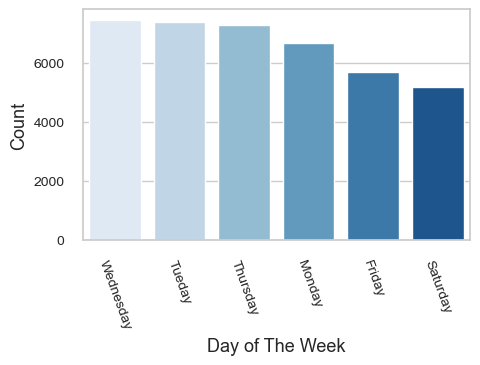

In [36]:
# Showing the number of observations for each day

plt.figure(figsize=(5,3))
sns.countplot( x=df_exp['day_of_the_week'], order = df_exp['day_of_the_week'].value_counts().index, palette = 'Blues')
plt.ylabel('Count', fontsize=13) 
plt.xlabel('Day of The Week', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=-70);

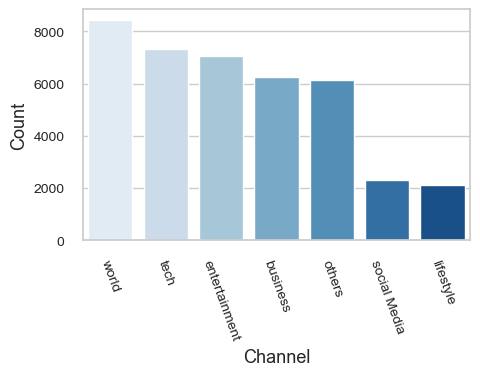

In [37]:
# Showing the number of observations for each channel

plt.figure(figsize=(5,3))
sns.countplot( x=df_exp['channel'], order = df_exp['channel'].value_counts().index, palette = 'Blues')
plt.ylabel('Count', fontsize=13) 
plt.xlabel('Channel', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=-70);

## Predicting The Shares With Multilinear Regression (MLR)

At a first glance, I can see that I won't be using "timedelta" - as well as the "url" feature which is essentially the id column. Both of them can be dropped.

I need to drop a column from the  "day of the week" features to avoid the dummy variable trap. On the other hand, I already established that the channel features had already dropped one variant.

I also suspect that we need to address the multicollinearity of the features before creating the first MLR model.

In [38]:
# I will start using the "df_news" dataframe again.
# Dropping the "timedelta" and "url" features

df_news = df_news.drop(['timedelta','url'], axis=1)
df_news.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_w

### Avoiding The Dummy Variable Trap

In [39]:
# I need to drop one of the week of the week features.
# I randomly chose tuesday.

df_news = df_news.drop(['weekday_is_tuesday'], axis=1)
df_news.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_shares', 'weekday_is_monday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_p

### Multicollinearity of Features

Before diving into the modelling, I will check the multicollinearity between my numerical values to decide which ones shouldn't be used.

In [40]:
numerical = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
             'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
             'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 
             'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 
             'self_reference_max_shares', 'self_reference_avg_shares', 'global_subjectivity', 
             'global_sentiment_polarity', 'global_rate_positive_words', 
             'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 
             'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
             'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
             'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'num_external_hrefs']

# New dataframe of numberical features only
df_num = df_news[numerical]

#Displaying the new dataframe
df_num.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,num_external_hrefs
0,12.00,219.00,0.66,1.00,0.82,4.00,2.00,1.00,0.00,4.68,...,0.10,0.70,-0.35,-0.60,-0.20,0.50,-0.19,0.00,0.19,2.00
1,9.00,255.00,0.60,1.00,0.79,3.00,1.00,1.00,0.00,4.91,...,0.03,0.70,-0.12,-0.12,-0.10,0.00,0.00,0.50,0.00,2.00
2,9.00,211.00,0.58,1.00,0.66,3.00,1.00,1.00,0.00,4.39,...,0.10,1.00,-0.47,-0.80,-0.13,0.00,0.00,0.50,0.00,2.00
3,9.00,531.00,0.50,1.00,0.67,9.00,0.00,1.00,0.00,4.40,...,0.14,0.80,-0.37,-0.60,-0.17,0.00,0.00,0.50,0.00,9.00
4,13.00,1072.00,0.42,1.00,0.54,19.00,19.00,20.00,0.00,4.68,...,0.03,1.00,-0.22,-0.50,-0.05,0.45,0.14,0.05,0.14,0.00


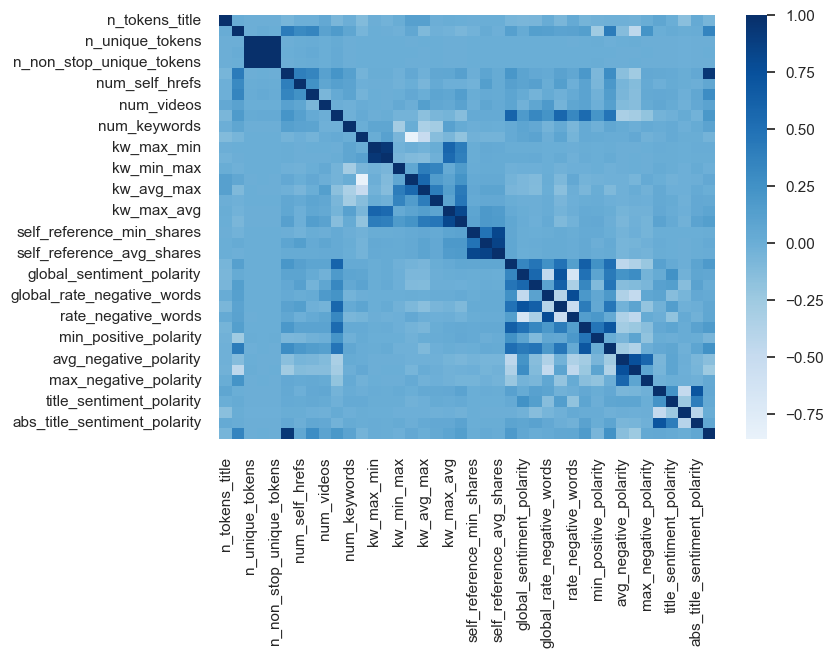

In [41]:
# Creating a heatmap of the independent variables
sns.heatmap(df_num.corr(), center=0, cmap = 'Blues');

Not seeing many dark shades, which is a good news for my model.

In [42]:
# Creating a table that will show the highly correlated features 
# Correlation greater than 0.75                           
df = df_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]

,feature1,feature2,corr
83,n_unique_tokens,n_non_stop_words,1.00
84,n_unique_tokens,n_non_stop_unique_tokens,1.00
122,n_non_stop_words,n_unique_tokens,1.00
124,n_non_stop_words,n_non_stop_unique_tokens,1.00
162,n_non_stop_unique_tokens,n_unique_tokens,1.00
163,n_non_stop_unique_tokens,n_non_stop_words,1.00
239,num_hrefs,num_external_hrefs,0.94
455,kw_min_min,kw_max_max,0.86
493,kw_max_min,kw_avg_min,0.94
532,kw_avg_min,kw_max_min,0.94


I'll drop the following features:

* num_hrefs
* kw_min_min
* kw_max_min
* kw_max_avg
* self_reference_avg_shares
* global_rate_negative_words
* n_non_stop_words
* n_non_stop_unique_tokens

In [43]:
# I will create a new dataframe without the features I'm excluding.
# I'm not simply dropping the features because I may need to use them in the future.

df_final = df_news.drop([ 'num_hrefs', 'kw_min_min', 'kw_max_min', 'kw_max_avg', 'self_reference_avg_shares',
                         'global_rate_negative_words', 'n_non_stop_words', 'n_non_stop_unique_tokens'], axis=1)

# Displaying the new dataframe
df_final.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,num_external_hrefs
0,12.00,219.00,0.66,2.00,1.00,0.00,4.68,5.00,0.00,1.00,...,0.70,-0.35,-0.60,-0.20,0.50,-0.19,0.00,0.19,593,2.00
1,9.00,255.00,0.60,1.00,1.00,0.00,4.91,4.00,0.00,0.00,...,0.70,-0.12,-0.12,-0.10,0.00,0.00,0.50,0.00,711,2.00
2,9.00,211.00,0.58,1.00,1.00,0.00,4.39,6.00,0.00,0.00,...,1.00,-0.47,-0.80,-0.13,0.00,0.00,0.50,0.00,1500,2.00
3,9.00,531.00,0.50,0.00,1.00,0.00,4.40,7.00,0.00,1.00,...,0.80,-0.37,-0.60,-0.17,0.00,0.00,0.50,0.00,1200,9.00
4,13.00,1072.00,0.42,19.00,20.00,0.00,4.68,7.00,0.00,0.00,...,1.00,-0.22,-0.50,-0.05,0.45,0.14,0.05,0.14,505,0.00


### Checking for Linearity of Parameters

Although it's not required to have a linear relationship between the dependent variable (shares) and the independent variables (features), checking linearity of the features help identifying the categorical variables and gives an idea of the future transformations.

In [44]:
def plot(df, target='shares'):
    fig, ax = plt.subplots(nrows = len(df.columns), figsize=(13,77))
    
    for i, col in enumerate(df.columns):
#         sns.lmplot(x=col, y=target, data=df)
        ax[i].scatter(df[col], df[target])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")

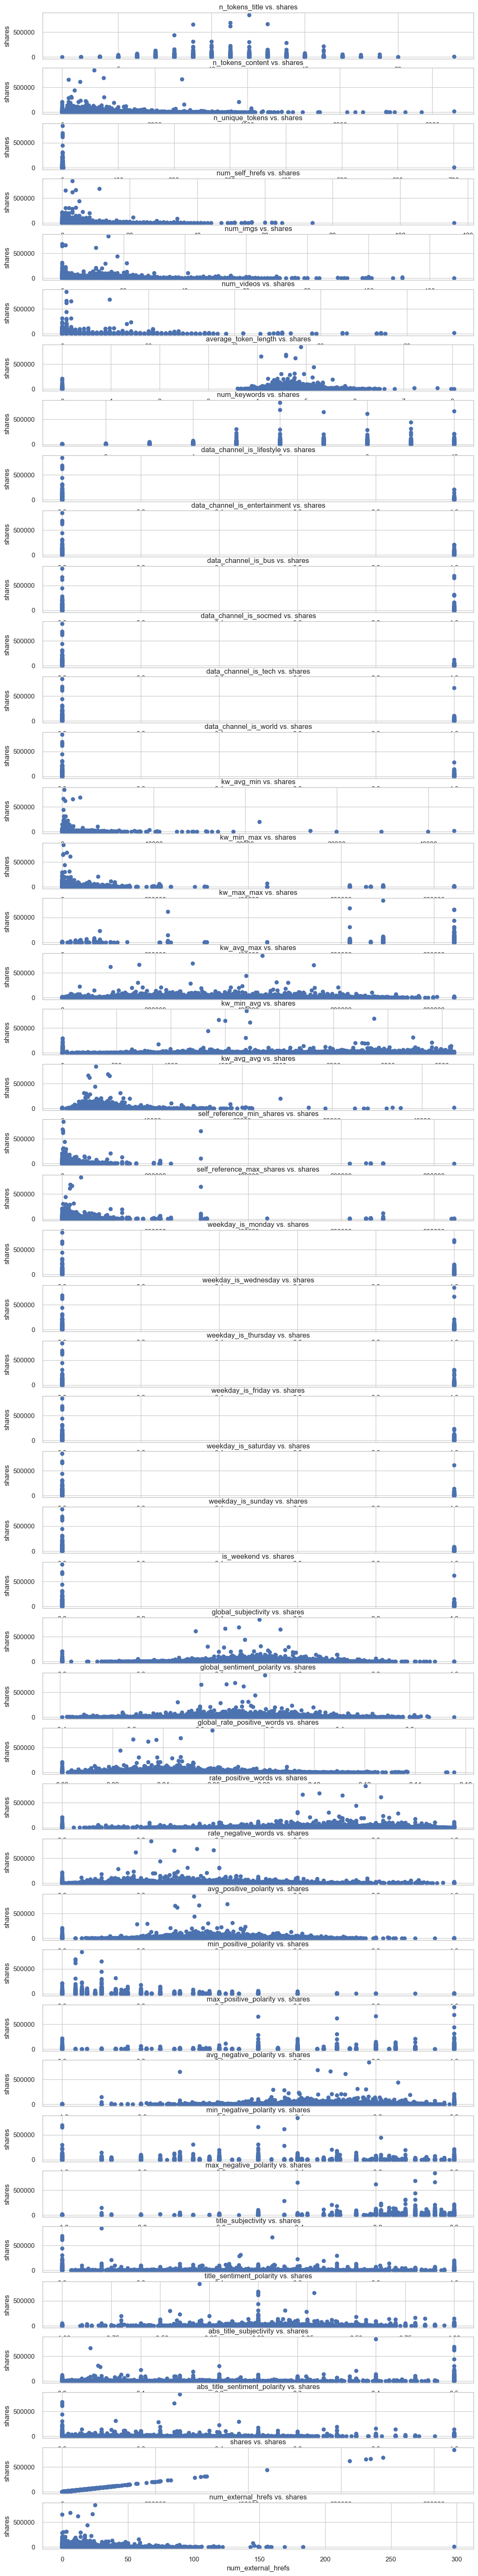

In [45]:
plot(df=df_final, target='shares')

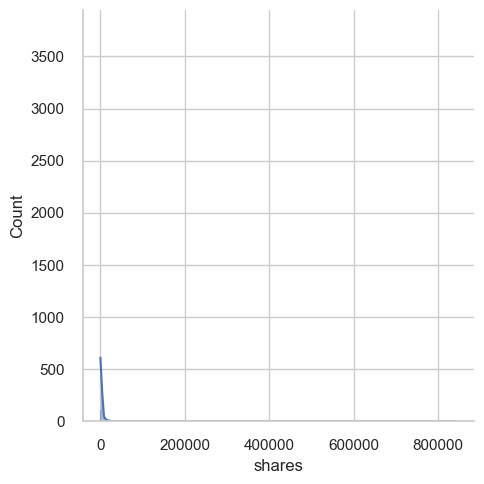

In [46]:
# I want to have a close look at my dependent variable's distribution too.
sns.displot(data=df_final, x="shares", kde=True);

In [47]:
# The displot looks off. I will remove the "shares" outliers from the data and try to plot the distribution again.
# I'll clean the data in the 1% percentage range
q = df_final['shares'].quantile(0.99)
df_final[df_final['shares'] < q]

# Removing lower and upper outliers
# Combining condition with an AND statement

q_low = df_final['shares'].quantile(0.01)
q_hi  = df_final['shares'].quantile(0.99)

df_filtered = df_final[(df_final['shares'] < q_hi) & (df_final['shares'] > q_low)]
df_filtered.shape

(38849, 46)

795 rows are removed.

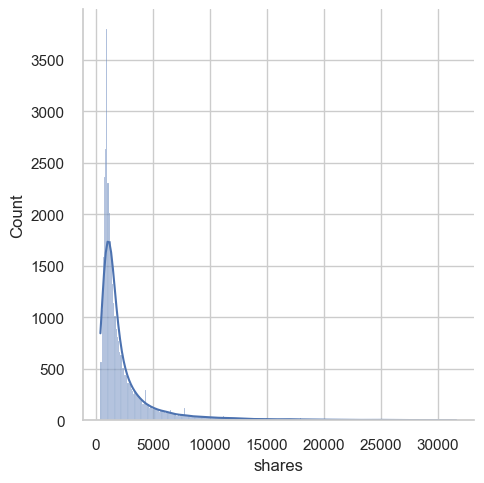

In [48]:
# Let's run the displot again
sns.displot(data=df_filtered, x="shares", kde=True);

Comments:
* The majority of the data has a left skewness to it. It includes my dependent variable, shares. Even though it doesn't violate any of the primary assumptions of the linear regression, it may cause some problems with the residual distribution in the future.
* Some of the data is between 0 and 1 - but the majority is not. I can clearly see the difference in the magnitudes.
* None of the features don't appear to have a strong linear relationship with shares.
* Because there's a limited space for the meta title and a limit for the meta keywords, some of the features can be treated as categorical as well as numerical (i.e. num_of_tokens, num_keywords).
* Finally, there are outliers as expected.

## Model Creation

This is the step where we fit the data with a multilinear regression model. It is an iterative approach that will tune models to get the highest performance possible.

While creating the model iterations, we'll check the primary assumptions for the multilinear regression - linearity, normality and homoscedasticity. We'll also use a "train and test split" to validate each model iteration.

### Iteration 0: Baseline Model

Even though I will not fit the baseline model, I'll state that this naive model is the first iteration (itearion 0). It doesn't use any of the indepenedent variables to predict the depedent variable (Y). Instead, it uses the mean of the observed the values of Y. 

R2 values are calculated using the baseline model and (squared errors for the fitted model and the baseline model). That's way the R2 would be always 0.

### Iteration 1: Model 1

I will create the first model without running any additional transformations. So far, I removed the predictors that have high multicolinaerity and removed the outliers of "y".

In [49]:
# First, I'm splitting the data into train and test groups

# X is my independent variables aka features
X = df_filtered.drop('shares', axis=1)

# Y is my dependent variable which is "shares" in this model
y = df_filtered['shares']

# Splitting the data
# Using a random state for reproducible output
# I picked "12" as a random state
# We have 38,849 entries in this dataframe and I need to decide what the split ratio will be.
# With less testing data, the performance of the model will have greater variance.
# With less training data, my parameters estimates will have greater variance.
# Because the size of my sample (n=38,849) is not too large, I'll follow the industry best practice.
# I'm using 80/20 split here (instead of 75/25 default split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=12)

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# Fitting a linear regression model and calculate MSE for test and train
linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

y_hat_train = linreg_1.predict(X_train)
y_hat_test = linreg_1.predict(X_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_train, y_hat_train)
test_r2 = r2_score(y_test, y_hat_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.06142913259718419 & Mean Absolute Error 12693140.068129035
Testing Scores: R2 0.04903873348002663 & Mean Absolute Error 11904220.610349648


#### Comments:

- The training R2 is 25.27% higher than the training R2. It indicates a slight overfitting.
- The training Mean Absolute Error (MSE) is 6.63% higher than the training MSE - which is not bad.

My main concern here is having very low R2s - which means that the model is not doing a good job predicting the dependent variable in the first place. So the errors we're reading from the train vs test split are not reliable.

#### Evaluation of The Model 1

In [52]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_train X_test y_train y_test 

X_train_with_intercept = sm.add_constant(X_train)
model_1 = sm.OLS(y_train,X_train_with_intercept).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     49.05
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:00   Log-Likelihood:            -3.1691e+05
No. Observations:               33021   AIC:                         6.339e+05
Df Residuals:                   32976   BIC:                         6.343e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1778.0860    221.027      8.045      0.000    1344.866    2211.306
n_tokens_title                   14.1024      9.778      1.442      0.149      -5.063      33.268
n_tokens_content                 -0.0321      0.062     -0.520      0.603      -0.153       0.089
n_unique_tokens                   6.4205      5.118      1.254      0.210      -3.611      16.452
num_self_hrefs                  -19.0019      5.735     -3.313      0.001     -30.243      -7.761
num_imgs                         13.5289      2.819      4.799      0.000       8.004      19.054
num_videos                       11.7970      5.210      2.264      0.024       1.585      22.008
average_token_length           -217.9224     77.111     -2.826      0.005    -369.062     -66.783
num_keywords                     20.7344     12.482      1.661      0.097      -3.732      45.200
data_channel_is_lifestyle      -335.6482    108.105     -3.105      0.002    -547.537    -123.759
data_channel_is_entertainment  -838.0330     80.814    -10.370      0.000    -996.432    -679.635
data_channel_is_bus            -534.7264     84.507     -6.328      0.000    -700.362    -369.091
data_channel_is_socmed          171.7365    107.556      1.597      0.110     -39.078     382.551
data_channel_is_tech           -101.2648     85.033     -1.191      0.234    -267.933      65.403
data_channel_is_world          -799.4436     87.902     -9.095      0.000    -971.735    -627.152
kw_avg_min                       -0.1834      0.040     -4.528      0.000      -0.263      -0.104
kw_min_max                       -0.0010      0.000     -2.498      0.013      -0.002      -0.000
kw_max_max                       -0.0004      0.000     -3.225      0.001      -0.001      -0.000
kw_avg_max                       -0.0004      0.000     -1.577      0.115      -0.001       0.000
kw_min_avg                       -0.0109      0.022     -0.499      0.618      -0.054       0.032
kw_avg_avg                        0.4527      0.024     18.811      0.000       0.406       0.500
self_reference_min_shares         0.0081      0.001      6.856      0.000       0.006       0.010
self_reference_max_shares        -0.0003      0.001     -0.572      0.567      -0.001       0.001
weekday_is_monday               205.9749     66.031      3.119      0.002      76.552     335.398
weekday_is_wednesday              9.8115     64.135      0.153      0.878    -115.896     135.519
weekday_is_thursday               8.3356     64.570      0.129      0.897    -118.223     134.894
weekday_is_friday                81.1495     68.929      1.177      0.239     -53.953     216.252
weekday_is_saturday             168.9681     60.297      2.802      0.005      50.784     287.152
weekday_is_sunday               233.8945     

#### Comments:

- P-value for the F-statistic is display as 0. It's a very small value and definetely below 0.05. We can reject the null hypothesis and conclude that at least one of the independent variables has a statistically significant effect on the dependent variable.

- Our Adj. R-squared is 6% which means only 6% of the variations in dependent variable y are explained by the independent variables in our model. It's a very very low score to start with.

- Majority of the variables don't appear to be statistically significant. In the next iterations, I'll need to remove them from the dataset.

- The very high Jarque-Bera result shows that the errors are not normally distributed.

- The smallest eigenvalue warning is pointing out to a possible multicollinearity in the model.

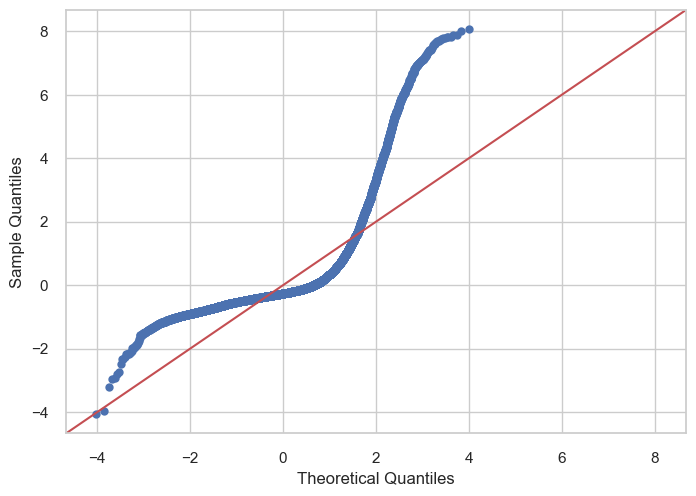

In [53]:
# Let's look into the normality assumptions with visuals.
# Drawing a Q-Q Plot the check how the errors are distributed.
resid1 = model_1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

As expected, the residuals are somewhat normally distributed.

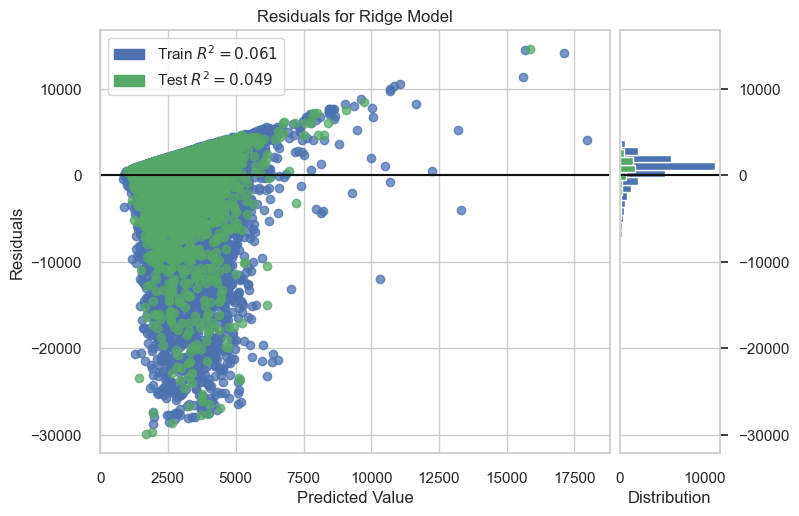

In [54]:
# Let's check the homoscedasticity
# Instantiate the linear model and visualizer
model_1 = Ridge()
visualizer = ResidualsPlot(model_1)
# Fit the training data
visualizer.fit(X_train, y_train) 
# Score the test data
visualizer.score(X_test, y_test)
# Plot the residuals
visualizer.show();

We can clearly see that the residuals are not homoscedastic.

### Iteration 2: Model 2

I'll remove the features that are not relevant to model in my iteration 2. The reason why I'm doing it now is to reduce the number of the features to make it easier to manage.

In [55]:
# Now, I will remove the irrelevant features from my model to see if it'll improve the adjusted R2 score.
# I'm using the "Stepwise Selection" method

predictors = df_filtered.drop('shares', axis=1)


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(predictors, df_filtered['shares'], verbose=True)
print('resulting features:')
print(result)

/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  kw_avg_avg                     with p-value 1.74654e-291
Add  data_channel_is_world          with p-value 5.9267e-31


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  num_external_hrefs             with p-value 1.69791e-32


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  data_channel_is_entertainment  with p-value 1.16654e-28


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  data_channel_is_bus            with p-value 2.35197e-40


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  is_weekend                     with p-value 5.1242e-25


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  self_reference_min_shares      with p-value 3.44714e-15


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  average_token_length           with p-value 5.02565e-09


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  global_subjectivity            with p-value 5.22883e-17


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  num_imgs                       with p-value 8.45459e-07


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  kw_max_max                     with p-value 1.01139e-06


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  kw_avg_min                     with p-value 5.38644e-08


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  kw_min_max                     with p-value 0.000142231


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  weekday_is_monday              with p-value 0.000362975


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  data_channel_is_socmed         with p-value 0.000934505


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  global_sentiment_polarity      with p-value 0.00109985


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  title_sentiment_polarity       with p-value 7.51275e-05


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  num_self_hrefs                 with p-value 0.00220684


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  num_videos                     with p-value 0.0010982


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  abs_title_subjectivity         with p-value 0.00207162


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  title_subjectivity             with p-value 0.000324364


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  num_keywords                   with p-value 0.00290688


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  data_channel_is_lifestyle      with p-value 0.00314903


/var/folders/vy/d19qxr917mzdtrl1dr51wh980000gn/T/ipykernel_7670/1953148882.py:30: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['kw_avg_avg', 'data_channel_is_world', 'num_external_hrefs', 'data_channel_is_entertainment', 'data_channel_is_bus', 'is_weekend', 'self_reference_min_shares', 'average_token_length', 'global_subjectivity', 'num_imgs', 'kw_max_max', 'kw_avg_min', 'kw_min_max', 'weekday_is_monday', 'data_channel_is_socmed', 'global_sentiment_polarity', 'title_sentiment_polarity', 'num_self_hrefs', 'num_videos', 'abs_title_subjectivity', 'title_subjectivity', 'num_keywords', 'data_channel_is_lifestyle']


Based on the stepwise selection, the following features' p-value didn't fall within the 95% confidence interval and failed the test - meaning, there was no effect observed. I'm removing them from my model.

* n_tokens_title
* n_tokens_content
* n_unique_tokens
* num_keywords
* data_channel_is_socmed
* data_channel_is_tech
* kw_min_max
* kw_max_max
* kw_min_avg
* kw_avg_min
* self_reference_max_shares
* weekday_is_wednesday
* weekday_is_thursday
* weekday_is_friday
* weekday_is_saturday
* weekday_is_sunday
* global_rate_positive_words
* rate_positive_words
* rate_negative_words
* avg_positive_polarity
* min_positive_polarity
* max_positive_polarity
* avg_negative_polarity
* min_negative_polarity
* max_negative_polarity
* abs_title_sentiment_polarity

In [56]:
df_it2 = df_filtered.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_keywords', 
                           'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_max', 'kw_max_max', 
                           'kw_min_avg', 'self_reference_max_shares', 'weekday_is_wednesday', 
                           'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 
                           'weekday_is_sunday', 'global_rate_positive_words', 'rate_positive_words', 
                           'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 
                           'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
                           'max_negative_polarity', 'abs_title_sentiment_polarity', 'kw_avg_min'], axis=1)

In [57]:
df_it2.describe().T

,count,mean,std,min,25%,50%,75%,max
num_self_hrefs,38849.00,3.31,3.86,0.00,1.00,3.00,4.00,116.00
num_imgs,38849.00,4.54,8.31,0.00,1.00,1.00,4.00,128.00
num_videos,38849.00,1.25,4.11,0.00,0.00,0.00,1.00,91.00
average_token_length,38849.00,4.55,0.85,0.00,4.48,4.66,4.85,8.04
data_channel_is_lifestyle,38849.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00
data_channel_is_entertainment,38849.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
data_channel_is_bus,38849.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
data_channel_is_world,38849.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
kw_avg_max,38849.00,259001.57,134777.84,0.00,172983.33,244433.33,330637.50,843300.00
kw_avg_avg,38849.00,3130.25,1304.12,0.00,2382.72,2868.51,3594.38,43567.66


In [58]:
# X is my independent variables aka features
X_2 = df_it2.drop('shares', axis=1)

# Y is my dependent variable which is "price" in this model
Y_2 = df_it2["shares"]

# Splitting the data
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, Y_2, test_size = 0.2, random_state=18)

In [59]:
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

LinearRegression()

In [60]:
#Fitting a linear regression model and calculate MSE for test and train
linreg_2 = LinearRegression()
linreg_2.fit(X_2_train, y_2_train)

y_2_hat_train = linreg_2.predict(X_2_train)
y_2_hat_test = linreg_2.predict(X_2_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_2_train, y_2_hat_train)
test_r2 = r2_score(y_2_test, y_2_hat_test)

train_mse = mean_squared_error(y_2_train, y_2_hat_train)
test_mse = mean_squared_error(y_2_test, y_2_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.059375936777448346 & Mean Absolute Error 12574222.289781384
Testing Scores: R2 0.05157495159124059 & Mean Absolute Error 12705482.912334818


#### Comments:

- The training R2 is 15.13% higher than the training R2. It's better than the previous model.
- The training Mean Absolute Error (MSE) is 1.03% lower than the training MSE - which is not bad.

I need to address the overfitting issue in the next iterations.

#### Evaluation of The Model 2

In [61]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 

X_2_train_with_intercept = sm.add_constant(X_2_train)
model_2 = sm.OLS(y_2_train,X_2_train_with_intercept).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:13   Log-Likelihood:            -2.9813e+05
No. Observations:               31079   AIC:                         5.963e+05
Df Residuals:                   31059   BIC:                         5.965e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1880.5820    148.881     12.631      0.000    1588.770    2172.394
num_self_hrefs                  -21.3625      5.502     -3.883      0.000     -32.147     -10.579
num_imgs                         12.7915      2.680      4.773      0.000       7.539      18.044
num_videos                       20.3236      5.101      3.984      0.000      10.326      30.322
average_token_length           -255.7968     32.461     -7.880      0.000    -319.421    -192.173
data_channel_is_lifestyle      -360.6536     94.609     -3.812      0.000    -546.090    -175.217
data_channel_is_entertainment  -777.9750     58.524    -13.293      0.000    -892.684    -663.266
data_channel_is_bus            -517.3214     63.785     -8.110      0.000    -642.343    -392.300
data_channel_is_world          -746.1329     60.734    -12.285      0.000    -865.174    -627.091
kw_avg_max                       -0.0007      0.000     -3.858      0.000      -0.001      -0.000
kw_avg_avg                        0.4151      0.019     22.149      0.000       0.378       0.452
self_reference_min_shares         0.0066      0.001      6.703      0.000       0.005       0.008
weekday_is_monday               163.7161     54.755      2.990      0.003      56.395     271.037
is_weekend                      569.6804     60.941      9.348      0.000     450.234     689.127
global_subjectivity            1724.7608    241.015      7.156      0.000    1252.361    2197.161
global_sentiment_polarity      -620.6712    235.071     -2.640      0.008   -1081.420    -159.923
title_subjectivity              271.1241     73.580      3.685      0.000     126.904     415.344
title_sentiment_polarity        296.9622     82.086      3.618      0.000     136.069     457.855
abs_title_subjectivity          595.6919    124.403      4.788      0.000     351.857     839.527
num_external_hrefs               17.7715      2.119      8.388      0.000      13.619      21.924
==============================================================================
Omnibus:                    24135.908   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473258.938
Skew:                           3.700   Prob(JB):                         0.00
Kurtosis:                      20.627   Cond. No.                     3.88e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comments:

- There's no significant change in the model. By removing the features that are not impacting the outcome made my model easier to manage for the future iterations.

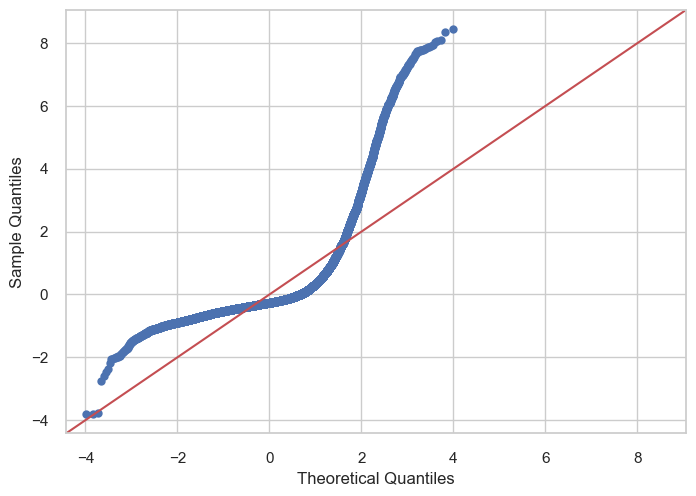

In [62]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid2 = model_2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

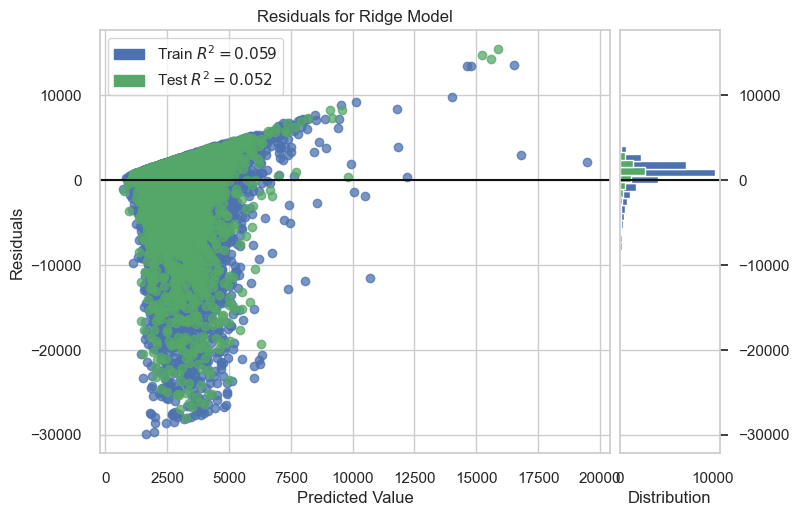

In [63]:
# Instantiate the linear model and visualizer
model_2 = Ridge()
visualizer = ResidualsPlot(model_2)
# Fit the training data
visualizer.fit(X_2_train, y_2_train) 
# Score the test data
visualizer.score(X_2_test, y_2_test)
# Plot the residuals
visualizer.show();

As expected, there is no significant change in the residual plots as well.

### Iteration 3: Model 3

In this iteration, I'll run a log transformation to make the continues variables more linear.

In [64]:
# 'global_sentiment_polarity' and 'title_sentiment_polarity'
# Since we can't apply a log tranfsormation to negative values, I'll exclude them from the next step.

log_columns = ['num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'kw_avg_max',
               'kw_avg_avg', 'self_reference_min_shares','global_subjectivity', 'title_subjectivity',
               'abs_title_subjectivity', 'num_external_hrefs']

# X is my independent variables aka features
X_3 = df_it2.drop('shares', axis=1)

# Y is my dependent variable which is "price" in this model
Y_3 = df_it2['shares']

# Splitting the data
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, Y_3, test_size = 0.2, random_state=31)

# Log transform the X_train column
X_3_train[log_columns] = np.log(X_3_train[log_columns] + 1)

# Log transform the X_test column
X_3_test[log_columns] = np.log(X_3_test[log_columns] + 1)

# Log transform the y_train column
y_3_train = np.log(y_3_train + 1)

# Log transform the y_test  column
y_3_test = np.log(y_3_test + 1)

In [65]:
regressor = LinearRegression()
regressor.fit(X_3_train, y_3_train)

LinearRegression()

In [66]:
# Fitting a linear regression model and calculate MSE for test and train
linreg_3 = LinearRegression()
linreg_3.fit(X_3_train, y_3_train)

y_3_hat_train = linreg_3.predict(X_3_train)
y_3_hat_test = linreg_3.predict(X_3_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_3_train, y_3_hat_train)
test_r2 = r2_score(y_3_test, y_3_hat_test)

train_mse = mean_squared_error(y_2_train, y_2_hat_train)
test_mse = mean_squared_error(y_2_test, y_2_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.10816381898759031 & Mean Absolute Error 12574222.289781384
Testing Scores: R2 0.11807060580532192 & Mean Absolute Error 12705482.912334818


#### Comments:

- The training R2 is 8.39% lower than the training R2.
- The training Mean Absolute Error (MSE) is 1.03% lower than the training MSE - which is very good.

Based on the MSEs, I'm confident that the model is a good fit - regardless of a low R2 score.

#### Evaluation of The Model 3

In [67]:
# I'll run the Ordinary Least Squares (OLS) Regression to evaluate the model.
#X_2_train X_2_test y_2_train y_2_test 

X_3_train_with_intercept = sm.add_constant(X_3_train)
model_3 = sm.OLS(y_3_train,X_3_train_with_intercept).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:14   Log-Likelihood:                -36623.
No. Observations:               31079   AIC:                         7.329e+04
Df Residuals:                   31059   BIC:                         7.345e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.3811      0.085     75.358      0.000       6.215       6.547
num_self_hrefs                   -0.0577      0.008     -7.116      0.000      -0.074      -0.042
num_imgs                          0.0318      0.005      6.163      0.000       0.022       0.042
num_videos                        0.0502      0.007      7.050      0.000       0.036       0.064
average_token_length             -0.2934      0.024    -12.278      0.000      -0.340      -0.247
data_channel_is_lifestyle        -0.1364      0.021     -6.488      0.000      -0.178      -0.095
data_channel_is_entertainment    -0.3417      0.013    -26.352      0.000      -0.367      -0.316
data_channel_is_bus              -0.1230      0.014     -8.654      0.000      -0.151      -0.095
data_channel_is_world            -0.3195      0.014    -23.486      0.000      -0.346      -0.293
kw_avg_max                       -0.1055      0.007    -15.054      0.000      -0.119      -0.092
kw_avg_avg                        0.3091      0.014     22.461      0.000       0.282       0.336
self_reference_min_shares         0.0258      0.002     14.110      0.000       0.022       0.029
weekday_is_monday                 0.0497      0.012      4.083      0.000       0.026       0.074
is_weekend                        0.2839      0.014     20.999      0.000       0.257       0.310
global_subjectivity               0.5324      0.080      6.619      0.000       0.375       0.690
global_sentiment_polarity        -0.0711      0.052     -1.366      0.172      -0.173       0.031
title_subjectivity                0.0705      0.023      3.011      0.003       0.025       0.116
title_sentiment_polarity          0.0900      0.018      4.959      0.000       0.054       0.126
abs_title_subjectivity            0.1923      0.037      5.236      0.000       0.120       0.264
num_external_hrefs                0.0637      0.005     12.712      0.000       0.054       0.074
==============================================================================
Omnibus:                     3913.503   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5679.773
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       3.864   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comments:

- Our R2 score has improved from 6% to 10.8% in this iteration - which is a 80% improvement. On the other hand, the R2 score itself is still low. The model only explains 10.8% of the variations in the share numbers.

- Our JB score is down by 98.62% that is also a significant improvement. However, it's still at large - indicating that the errors are not normally distributed.

- Finnaly, the warning around the "possible multicollinearity" is disappeared.

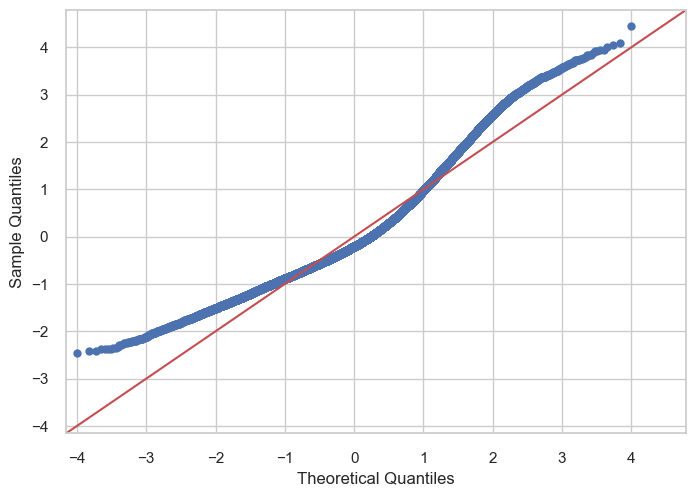

In [68]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid3 = model_3.resid
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

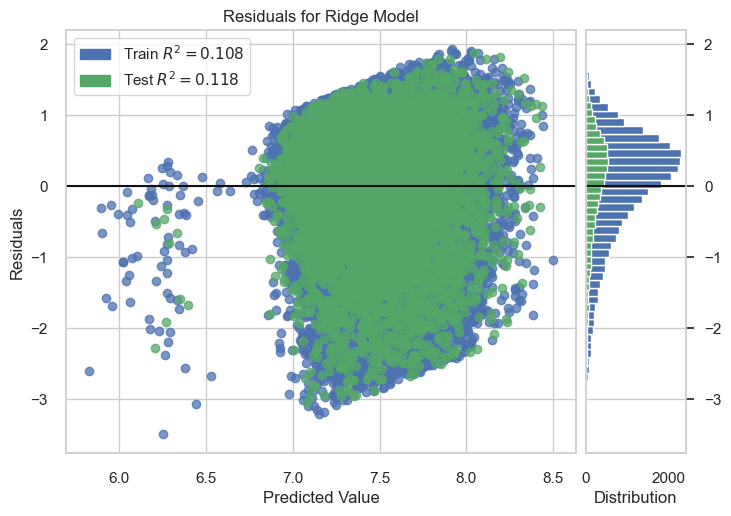

In [69]:
# Instantiate the linear model and visualizer
model_3 = Ridge()
visualizer = ResidualsPlot(model_3)
# Fit the training data
visualizer.fit(X_3_train, y_3_train) 
# Score the test data
visualizer.score(X_3_test, y_3_test)
# Plot the residuals
visualizer.show();

There's a significant improvement in the residual distribution. They look more homoskedastic now.

### Iteration 4: Model 4

In my final model, I will run a min-max scaler.

In [70]:
X_4 = X_3
X_4_train = X_3_train
X_4_test = X_3_test
y_4_train = y_3_train
y_4_test = y_3_test

cont = ['num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'kw_avg_max',
        'kw_avg_avg', 'self_reference_min_shares', 'global_subjectivity', 'title_subjectivity',
        'abs_title_subjectivity', 'num_external_hrefs', 'global_sentiment_polarity', 'title_sentiment_polarity']

def scaled(series):
    return (series - min(series)) / (max(series) - min(series))

X_4_train[cont] = X_4_train[cont].apply(scaled)
X_4_test[cont] = X_4_test[cont].apply(scaled)
y_4_train = scaled(y_4_train)
y_4_test = scaled(y_4_test)

In [71]:
regressor = LinearRegression()
regressor.fit(X_4_train, y_4_train)

LinearRegression()

In [72]:
#Fit a linear regression model and calculate MSE for test and train
linreg_4 = LinearRegression()
linreg_4.fit(X_4_train, y_4_train)

y_4_hat_train = linreg_4.predict(X_4_train)
y_4_hat_test = linreg_4.predict(X_4_test)

# Calculating the R2 and MSE

train_r2 = r2_score(y_4_train, y_4_hat_train)
test_r2 = r2_score(y_4_test, y_4_hat_test)

train_mse = mean_squared_error(y_4_train, y_4_hat_train)
test_mse = mean_squared_error(y_4_test, y_4_hat_test)

print('Training Scores:', 'R2', train_r2, '&', 'Mean Absolute Error', train_mse)
print('Testing Scores:', 'R2', test_r2, '&', 'Mean Absolute Error', test_mse)

Training Scores: R2 0.10816381898759031 & Mean Absolute Error 0.03174059317672232
Testing Scores: R2 0.11753031210193321 & Mean Absolute Error 0.03184501801460331


#### Comments:

- The training R2 is 7.97% lower than the training R2.
- The training Mean Absolute Error (MSE) is 0.33% lower than the training MSE - which is very good.

Based on the MSEs, I'm confident that the model is a good fit - regardless of a low R2 score.

#### Evaluation of The Model 4

In [73]:
# Running the OLS Regression
# X_4_train X_4_test y_4_train y_4_test 

X_4_train_with_intercept = sm.add_constant(X_4_train)
model_4 = sm.OLS(y_4_train,X_4_train_with_intercept).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:51:15   Log-Likelihood:                 9514.6
No. Observations:               31079   AIC:                        -1.899e+04
Df Residuals:                   31059   BIC:                        -1.882e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0839      0.020      4.152      0.000       0.044       0.123
num_self_hrefs                   -0.0565      0.008     -7.116      0.000      -0.072      -0.041
num_imgs                          0.0350      0.006      6.163      0.000       0.024       0.046
num_videos                        0.0515      0.007      7.050      0.000       0.037       0.066
average_token_length             -0.1464      0.012    -12.278      0.000      -0.170      -0.123
data_channel_is_lifestyle        -0.0309      0.005     -6.488      0.000      -0.040      -0.022
data_channel_is_entertainment    -0.0774      0.003    -26.352      0.000      -0.083      -0.072
data_channel_is_bus              -0.0279      0.003     -8.654      0.000      -0.034      -0.022
data_channel_is_world            -0.0724      0.003    -23.486      0.000      -0.078      -0.066
kw_avg_max                       -0.3261      0.022    -15.054      0.000      -0.369      -0.284
kw_avg_avg                        0.7483      0.033     22.461      0.000       0.683       0.814
self_reference_min_shares         0.0798      0.006     14.110      0.000       0.069       0.091
weekday_is_monday                 0.0113      0.003      4.083      0.000       0.006       0.017
is_weekend                        0.0643      0.003     20.999      0.000       0.058       0.070
global_subjectivity               0.0836      0.013      6.619      0.000       0.059       0.108
global_sentiment_polarity        -0.0178      0.013     -1.366      0.172      -0.043       0.008
title_subjectivity                0.0111      0.004      3.011      0.003       0.004       0.018
title_sentiment_polarity          0.0408      0.008      4.959      0.000       0.025       0.057
abs_title_subjectivity            0.0177      0.003      5.236      0.000       0.011       0.024
num_external_hrefs                0.0753      0.006     12.712      0.000       0.064       0.087
==============================================================================
Omnibus:                     3913.503   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5679.773
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       3.864   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comments:

- There's no chnage in the adjusted R2 value and JB score in this model compared to the previous one.

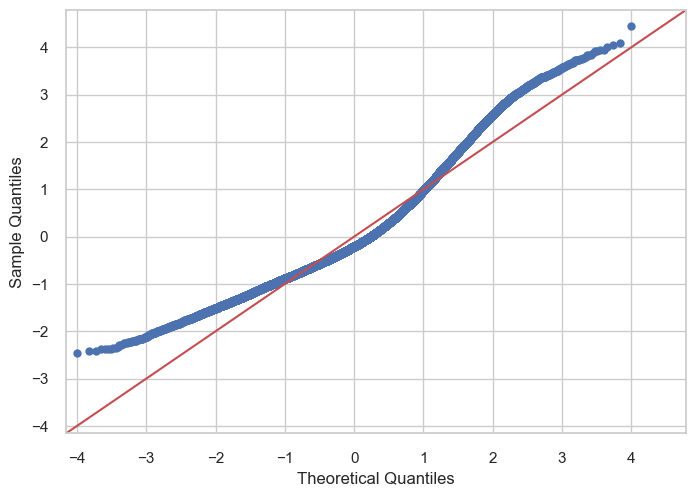

In [74]:
# Drawing a Q-Q Plot the check how the errors are distributed.
resid4 = model_4.resid
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

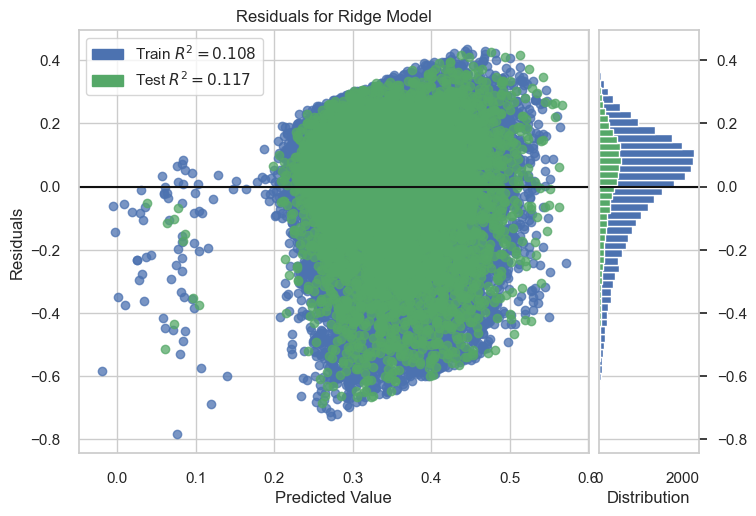

In [75]:
# Instantiate the linear model and visualizer
model_4 = Ridge()
visualizer = ResidualsPlot(model_4)
# Fit the training data
visualizer.fit(X_4_train, y_4_train) 
# Score the test data
visualizer.score(X_4_test, y_4_test)
# Plot the residuals
visualizer.show();

## Analysing The Final Model

***

In [76]:
#  Let's look at the coefficients of the features to see how each feature affects the total share.
# Creating a dictionary of features and their coefficients

coef_dict = dict(zip(X_4.columns, linreg_4.coef_)) 
sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

[('kw_avg_avg', 0.7482993017134746),
 ('global_subjectivity', 0.0836275136826682),
 ('self_reference_min_shares', 0.07982037546536565),
 ('num_external_hrefs', 0.07527949159456994),
 ('is_weekend', 0.06434161685436005),
 ('num_videos', 0.051471252530163866),
 ('title_sentiment_polarity', 0.040802040143077666),
 ('num_imgs', 0.03502884853817355),
 ('abs_title_subjectivity', 0.017665003807420386),
 ('weekday_is_monday', 0.011264284079303603),
 ('title_subjectivity', 0.011068671277932282),
 ('global_sentiment_polarity', -0.017845371114515035),
 ('data_channel_is_bus', -0.027875442625914876),
 ('data_channel_is_lifestyle', -0.030914790248255858),
 ('num_self_hrefs', -0.05648606634565663),
 ('data_channel_is_world', -0.07239990964387882),
 ('data_channel_is_entertainment', -0.07744314152587563),
 ('average_token_length', -0.14640681465673688),
 ('kw_avg_max', -0.32608153718284916)]

In [77]:
# Turning the dictionary into a list

df_features = pd.DataFrame.from_dict(coef_dict, orient ='index') 
df_features.sort_values(by=0, ascending=False)

,0
kw_avg_avg,0.75
global_subjectivity,0.08
self_reference_min_shares,0.08
num_external_hrefs,0.08
is_weekend,0.06
num_videos,0.05
title_sentiment_polarity,0.04
num_imgs,0.04
abs_title_subjectivity,0.02
weekday_is_monday,0.01


## Conclusions

After 4 iterations, I created a model that is a good fit - meaning that I can validate my model on the training dataset. However, the model can only explain 10.8% of the observed data. This result shows that the dataset is limited to predict the future share behaviour. That's why I used the model more in an explanatory way. 

Based on the model, the following features affects the final share number the most:
* kw_avg_avg
* global_subjectivity
* self_reference_min_shares
* num_external_hrefs

The following features are affecting the shares negatively:
* kw_avg_max
* average_token_length
* data_channel_is_entertainment
* data_channel_is_world

***

## Limitations & Next Steps


The biggest limitation and the challenge of this study was the dataset itself. It does a good job to identify some of the important features but is limited to fully explain the dynamics behind the Mashable's readers'article sharing behaviour. Looking at the features in the dataset, it lacks external factors and the group behaviours of individuals. We know that the relevancy of the articles to the current topic and trends, and whether or not someone influencial shares the article impacts its total shares. For the next studies, the dataset needs new featueres to reflects these.

***

## Acknowledgement 

This data set has been sourced from the Machine Learning Repository of University of California, Irvine Online News Popularity Data Set (UC Irvine). The UCI page mentions the following publication as the original source of the data set:

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal
***